# 📊 05 - Visualisation de Données avec Spark
Ce notebook a pour objectif de visualiser les données analysées.


In [1]:

# 0. Stoppe toute session existante
try:
    spark.stop()
except:
    pass

# 1. Recréation SparkSession avec 16 Go de RAM alloués
from pyspark.sql import SparkSession

spark = (
    SparkSession.builder
        .appName("05_visualisation")
        .master("local[*]")  # Utilise tous les cœurs disponibles
        .config("spark.hadoop.fs.defaultFS", "file:///")
        .config("spark.driver.host", "127.0.0.1")
        .config("spark.driver.bindAddress", "0.0.0.0")
        .config("spark.driver.memory", "16g")         # <-- alloue 16 Go au driver Spark
        .config("spark.executor.memory", "16g")       # <-- alloue 16 Go aux tâches exécutées (optionnel en local)
        .config("spark.sql.shuffle.partitions", "8")  # <-- limite les partitions pour limiter le thread/mémoire
        .getOrCreate()
)

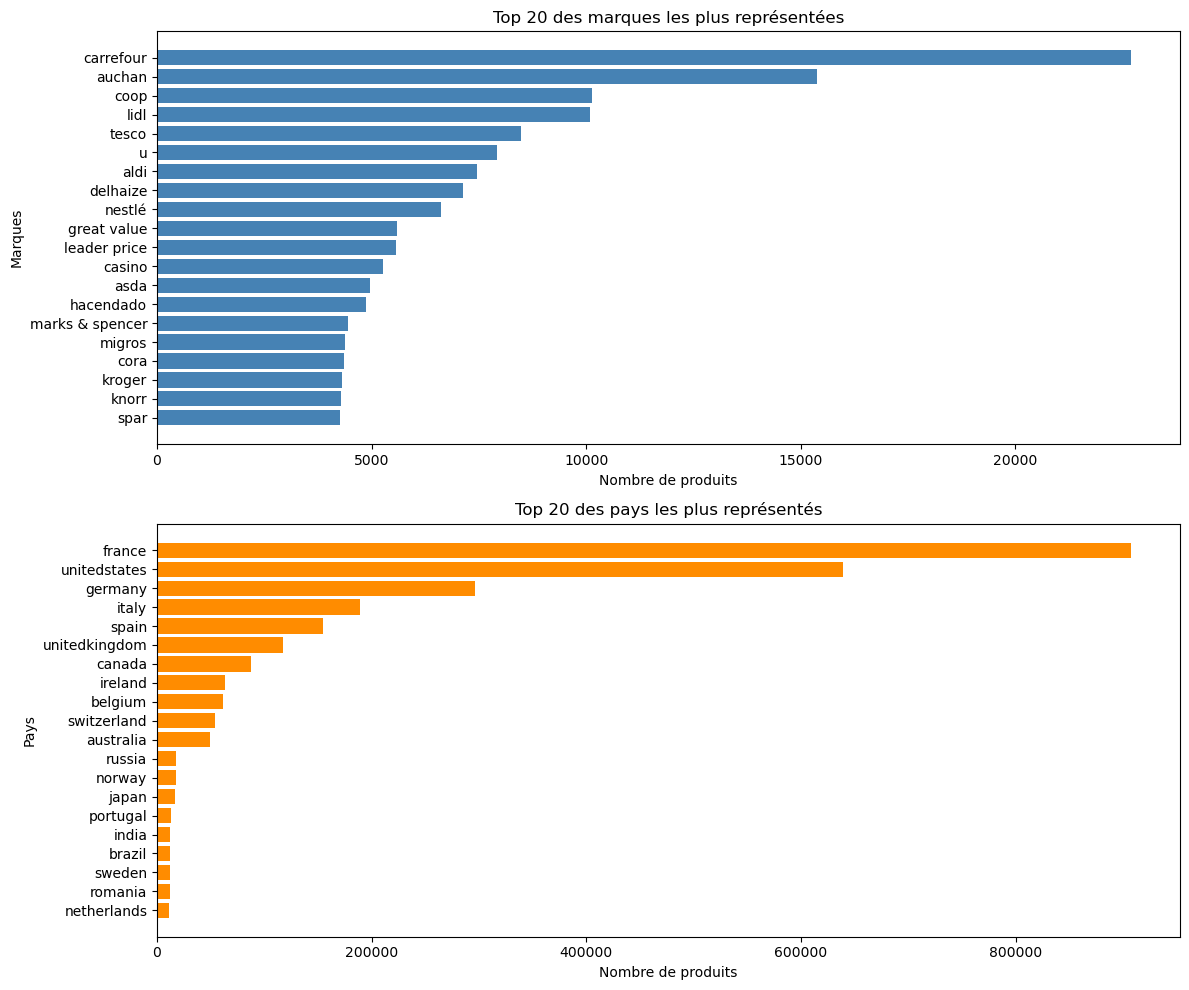

In [2]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import os

# Fonction utilitaire pour lire le seul CSV dans un dossier
def read_csv_from_folder(folder_path, sep=";"):
    file = [f for f in os.listdir(folder_path) if f.endswith(".csv")][0]
    return pd.read_csv(os.path.join(folder_path, file), sep=sep, low_memory=False)

# Chargement des données
df_brands = read_csv_from_folder("../data/viz/top_brands")
df_countries = read_csv_from_folder("../data/viz/top_countries")

# Séparer les colonnes fusionnées
df_brands[['brands', 'count']] = df_brands['brands,count'].str.split(",", expand=True)
df_countries[['country', 'count']] = df_countries['country,count'].str.split(",", expand=True)

# Convertir les valeurs en entiers
df_brands['count'] = pd.to_numeric(df_brands['count'])
df_countries['count'] = pd.to_numeric(df_countries['count'])

# Trier et limiter aux top 20
df_brands = df_brands.sort_values(by="count", ascending=False).head(20)
df_countries = df_countries.sort_values(by="count", ascending=False).head(20)

# Tracer les graphes
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Marques
axs[0].barh(df_brands['brands'], df_brands['count'], color='steelblue')
axs[0].invert_yaxis()
axs[0].set_title("Top 20 des marques les plus représentées")
axs[0].set_xlabel("Nombre de produits")
axs[0].set_ylabel("Marques")

# Pays
axs[1].barh(df_countries['country'], df_countries['count'], color='darkorange')
axs[1].invert_yaxis()
axs[1].set_title("Top 20 des pays les plus représentés")
axs[1].set_xlabel("Nombre de produits")
axs[1].set_ylabel("Pays")

plt.tight_layout()
plt.show()


In [3]:

# 📥 Chargement des données
df_env = read_csv_from_folder("../data/viz/score_env_by_country")
df_env['avg_score_env_composite_flexible'] = pd.to_numeric(df_env['avg_score_env_composite_flexible'])
df_env['count'] = pd.to_numeric(df_env['count'])

df_comp = read_csv_from_folder("../data/viz/score_composite_by_country")
df_comp['avg_score_composite'] = pd.to_numeric(df_comp['avg_score_composite'])
df_comp['count'] = pd.to_numeric(df_comp['count'])

# 🎛️ Options de tri combinées
sort_options = {
    "🌍 Pays les plus représentés (environnemental)": "env_count",
    "🌱 Pays avec les meilleurs scores environnementaux": "env_best",
    "☠️ Pays avec les pires scores environnementaux": "env_worst",
    "🍽️ Pays les plus représentés (alimentaire)": "comp_count",
    "🍏 Pays avec les meilleurs scores alimentaires": "comp_best",
    "🍟 Pays avec les pires scores alimentaires": "comp_worst"
}

# 📊 Fonction d'affichage du graphique
def update_graph(sort_key):
    if sort_key.startswith("env"):
        df = df_env
        value_col = "avg_score_env_composite_flexible"
        label = "Score environnemental moyen"
    else:
        df = df_comp
        value_col = "avg_score_composite"
        label = "Score alimentaire moyen"

    if sort_key.endswith("count"):
        df_plot = df.sort_values(by="count", ascending=False).head(20)
        title = "Top 20 des pays les plus représentés"
    elif sort_key.endswith("best"):
        df_plot = df.sort_values(by=value_col, ascending=False).head(20)
        title = "Top 20 des pays avec les meilleurs scores"
    elif sort_key.endswith("worst"):
        df_plot = df.sort_values(by=value_col, ascending=True).head(20)
        title = "Top 20 des pays avec les pires scores"

    fig = px.bar(
        df_plot,
        x=value_col,
        y="country",
        orientation="h",
        color=value_col,
        color_continuous_scale="RdYlGn",
        title=title,
        labels={value_col: label, "country": "Pays"}
    )
    fig.update_layout(yaxis=dict(autorange="reversed"))
    fig.show()

# 🧩 Affichage interactif
widgets.interact(update_graph, sort_key=widgets.Dropdown(
    options=sort_options,
    value="env_count",
    description="Vue :",
    style={'description_width': 'initial'}
))


interactive(children=(Dropdown(description='Vue :', options={'🌍 Pays les plus représentés (environnemental)': …

<function __main__.update_graph(sort_key)>

In [4]:

# 📥 Chargement des données
df_env = read_csv_from_folder("../data/viz/score_env_by_brand")
df_env['avg_score_env_composite_flexible'] = pd.to_numeric(df_env['avg_score_env_composite_flexible'])
df_env['count'] = pd.to_numeric(df_env['count'])

df_comp = read_csv_from_folder("../data/viz/score_composite_by_brand")
df_comp['avg_score_composite'] = pd.to_numeric(df_comp['avg_score_composite'])
df_comp['count'] = pd.to_numeric(df_comp['count'])

# 🎛️ Options du dropdown
sort_options = {
    "🌍 Marques les plus représentées (environnemental)": "env_count",
    "🌱 Marques avec les meilleurs scores environnementaux": "env_best",
    "☠️ Marques avec les pires scores environnementaux": "env_worst",
    "🍽️ Marques les plus représentées (alimentaire)": "comp_count",
    "🍏 Marques avec les meilleurs scores alimentaires": "comp_best",
    "🍟 Marques avec les pires scores alimentaires": "comp_worst"
}

# 📊 Fonction de tracé
def update_brand_graph(sort_key):
    if sort_key.startswith("env"):
        df = df_env
        value_col = "avg_score_env_composite_flexible"
        label = "Score environnemental moyen"
    else:
        df = df_comp
        value_col = "avg_score_composite"
        label = "Score alimentaire moyen"

    if sort_key.endswith("count"):
        df_plot = df.sort_values(by="count", ascending=False).head(20)
        title = "Top 20 des marques les plus représentées"
    elif sort_key.endswith("best"):
        df_plot = df.sort_values(by=value_col, ascending=False).head(20)
        title = "Top 20 des marques avec les meilleurs scores"
    elif sort_key.endswith("worst"):
        df_plot = df.sort_values(by=value_col, ascending=True).head(20)
        title = "Top 20 des marques avec les pires scores"

    fig = px.bar(
        df_plot,
        x=value_col,
        y="brands",
        orientation="h",
        color=value_col,
        color_continuous_scale="RdYlGn",
        title=title,
        labels={value_col: label, "brands": "Marques"}
    )
    fig.update_layout(yaxis=dict(autorange="reversed"))
    fig.show()

# 🧩 Widget interactif
widgets.interact(update_brand_graph, sort_key=widgets.Dropdown(
    options=sort_options,
    value="env_count",
    description="Vue :",
    style={'description_width': 'initial'}
))


interactive(children=(Dropdown(description='Vue :', options={'🌍 Marques les plus représentées (environnemental…

<function __main__.update_brand_graph(sort_key)>

Output()

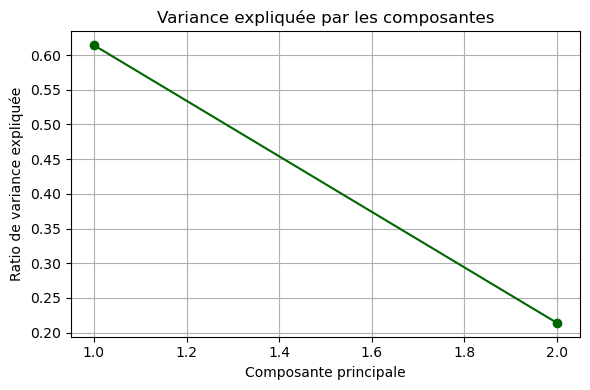

,avg_env_score,avg_composite_score,avg_kcal
PC1,0.562933,-0.563675,0.604464
PC2,0.710167,0.704016,-0.004864


In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import matplotlib.pyplot as plt
from IPython.display import display
import pandas as pd
import ipywidgets as widgets
from ipywidgets import VBox, HBox, Checkbox, ToggleButtons, Button, Output
import datetime

# 📥 Chargement des données
df = read_csv_from_folder("../data/viz/cube_agg_country_brand_scores_enriched")
df_clean = df.dropna(subset=["avg_env_score", "avg_composite_score", "avg_kcal"])

# 🔢 Top 100 marques
top_100_brands = df_clean["brands"].value_counts().nlargest(100).index
df_clean = df_clean[df_clean["brands"].isin(top_100_brands)]

# 🔎 Colonnes booléennes en has_*
bool_cols = [col for col in df_clean.columns if col.startswith("has_") and df_clean[col].dropna().map(type).eq(bool).all()]

# 🎯 PCA
features = ["avg_env_score", "avg_composite_score", "avg_kcal"]
X_scaled = StandardScaler().fit_transform(df_clean[features])
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
explained_var = pca.explained_variance_ratio_

df_pca = df_clean.copy()
df_pca["PC1"] = components[:, 0]
df_pca["PC2"] = components[:, 1]

# ✅ Widgets
checkboxes = []
for col in sorted(bool_cols):
    label = col.replace("has_", "").replace("_", " ").title()
    cb = Checkbox(description=label, value=False, indent=False)
    cb.colname = col
    checkboxes.append(cb)

tag_box = VBox(checkboxes)

country_dropdown = widgets.Dropdown(
    options=["Tous"] + sorted(df_pca["country"].dropna().unique()),
    value="Tous", description="Pays :"
)
kcal_slider = widgets.FloatRangeSlider(
    value=[df_pca["avg_kcal"].min(), df_pca["avg_kcal"].max()],
    min=df_pca["avg_kcal"].min(), max=df_pca["avg_kcal"].max(),
    step=10, description="kcal :", continuous_update=False
)
highlight_checkbox = widgets.Checkbox(value=False, description="Marques extrêmes uniquement")
projection_mode = ToggleButtons(
    options=[("PCA", "pca"), ("Brut (env vs comp)", "raw")], description="Affichage :"
)
update_button = Button(description="✅ Valider les filtres", button_style="success")
export_button = Button(description="📤 Exporter en CSV", button_style="info")
plot_output = Output()
filtered_data = pd.DataFrame()  # Variable globale pour export

# 📊 Fonction d'affichage
def update_plot(_=None):
    global filtered_data

    selected_tags = [cb.colname for cb in checkboxes if cb.value]
    selected_country = country_dropdown.value
    kcal_range = kcal_slider.value
    highlight_extremes = highlight_checkbox.value
    projection = projection_mode.value

    data = df_pca[
        (df_pca["avg_kcal"] >= kcal_range[0]) & (df_pca["avg_kcal"] <= kcal_range[1])
    ]

    if selected_country != "Tous":
        data = data[data["country"] == selected_country]

    for tag in selected_tags:
        if tag in data.columns:
            data = data[data[tag] == True]

    if highlight_extremes and not data.empty:
        q_env = data["avg_env_score"].quantile([0.1, 0.9])
        q_comp = data["avg_composite_score"].quantile([0.1, 0.9])
        data = data[
            (data["avg_env_score"] <= q_env[0.1]) | (data["avg_env_score"] >= q_env[0.9]) |
            (data["avg_composite_score"] <= q_comp[0.1]) | (data["avg_composite_score"] >= q_comp[0.9])
        ]

    filtered_data = data.copy()  # ⬅️ Pour export CSV

    with plot_output:
        plot_output.clear_output()
        if data.empty:
            print("⚠️ Aucune donnée à afficher pour les filtres sélectionnés.")
            return

        if projection == "pca":
            fig = px.scatter(
                data[data["PC2"] <= 1],
                x="PC1", y="PC2", color="brands",
                hover_data=["brands", "country", "avg_env_score", "avg_composite_score", "avg_kcal"],
                title=f"PCA des marques (PC1: {explained_var[0]*100:.1f}%, PC2: {explained_var[1]*100:.1f}%)"
            )
        else:
            fig = px.scatter(
                data,
                x="avg_env_score", y="avg_composite_score", color="brands",
                hover_data=["brands", "country", "avg_kcal"],
                title="Scatter : Score environnemental vs composite"
            )

        fig.update_layout(height=600)
        fig.show()

# 📤 Fonction d’export CSV
def export_csv(_):
    if filtered_data.empty:
        print("⚠️ Aucune donnée filtrée à exporter.")
        return
    filename = f"filtered_data_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
    filtered_data.to_csv(filename, index=False)
    print(f"✅ Données exportées sous : {filename}")

# 🔗 Connexions
update_button.on_click(update_plot)
export_button.on_click(export_csv)

# 🎛️ Interface finale
from ipywidgets import GridspecLayout, HTML, Layout

# ✅ Organisation 2 colonnes pour les checkboxes nutritionnelles
def create_checkbox_grid(checkboxes):
    rows = (len(checkboxes) + 1) // 2
    grid = GridspecLayout(rows, 2, grid_gap="6px")
    for i, cb in enumerate(checkboxes):
        grid[i // 2, i % 2] = cb
    return grid

# ✅ Mise en page finale avec sections
filters = VBox([
    HTML("<h4>🥗 Filtres nutritionnels</h4>"),
    create_checkbox_grid(checkboxes),

    HTML("<h4>🌍 Filtres généraux</h4>"),
    country_dropdown,
    kcal_slider,
    highlight_checkbox,

    HTML("<h4>📊 Mode d’affichage</h4>"),
    projection_mode,

    HBox([update_button, export_button], layout=Layout(justify_content="flex-start", margin="10px 0"))
], layout=Layout(
    border="1px solid lightgray",
    padding="18px",
    width="55%",
    margin="0 0 24px 0"
))

# ▶️ Affichage final
display(filters, plot_output)


# 📈 Variance expliquée
plt.figure(figsize=(6, 4))
plt.plot(range(1, 3), explained_var, marker='o', color='darkgreen')
plt.title("Variance expliquée par les composantes")
plt.xlabel("Composante principale")
plt.ylabel("Ratio de variance expliquée")
plt.grid(True)
plt.tight_layout()
plt.show()

# 🔍 Axes de la PCA
axes_df = pd.DataFrame(pca.components_, columns=features, index=["PC1", "PC2"])
display(axes_df)
